In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [227]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [228]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [229]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [230]:
df['Weather'].fillna(df.Weather.mode()[0], inplace=True)
df['Traffic_Level'].fillna(df.Traffic_Level.mode()[0], inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)

df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)
df.isna().sum()

/tmp/ipython-input-2884970398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df.Weather.mode()[0], inplace=True)
/tmp/ipython-input-2884970398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [231]:
df.duplicated().sum()

np.int64(0)

In [232]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.870301,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,4.579381,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


<Axes: xlabel='Delivery_Time_min', ylabel='Count'>

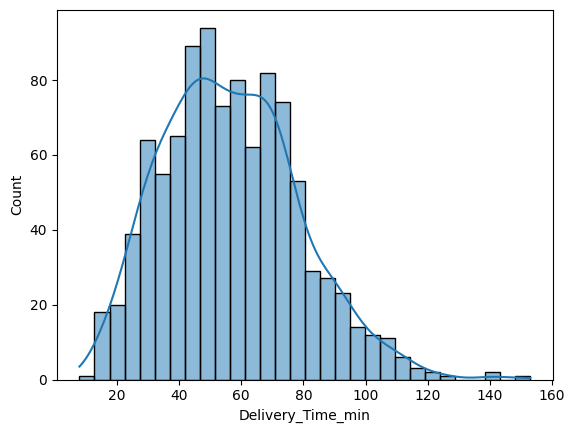

In [233]:
sns.histplot(df['Delivery_Time_min'],kde=True,bins=30)

<Axes: >

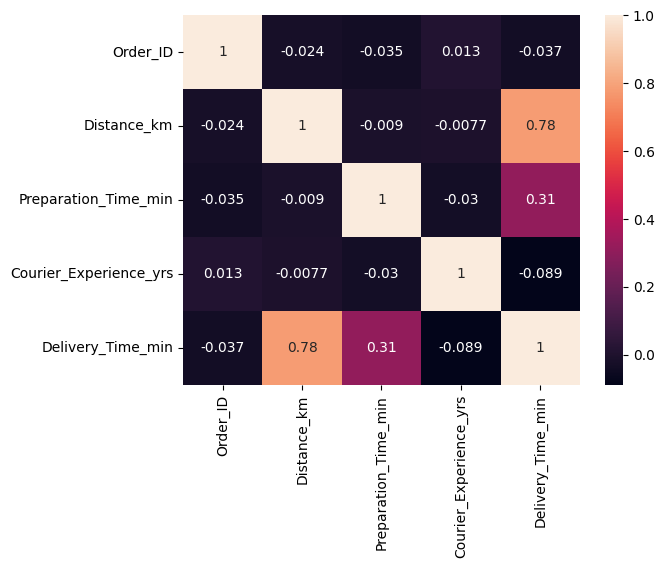

In [234]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

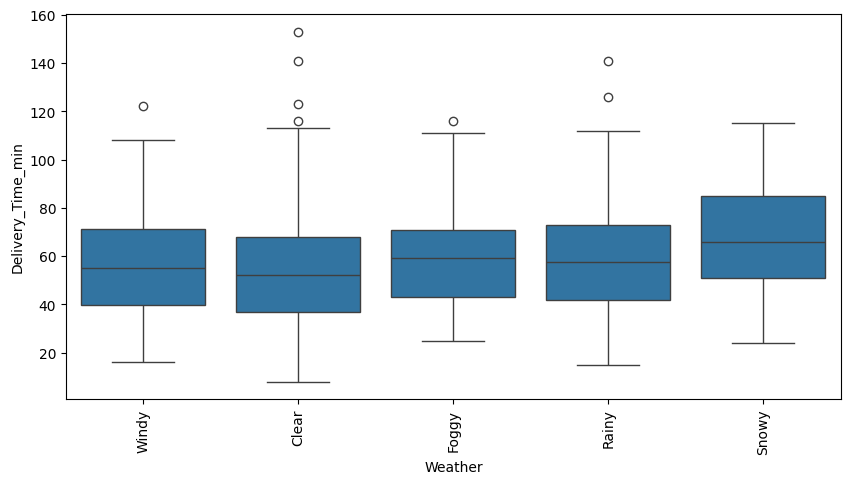

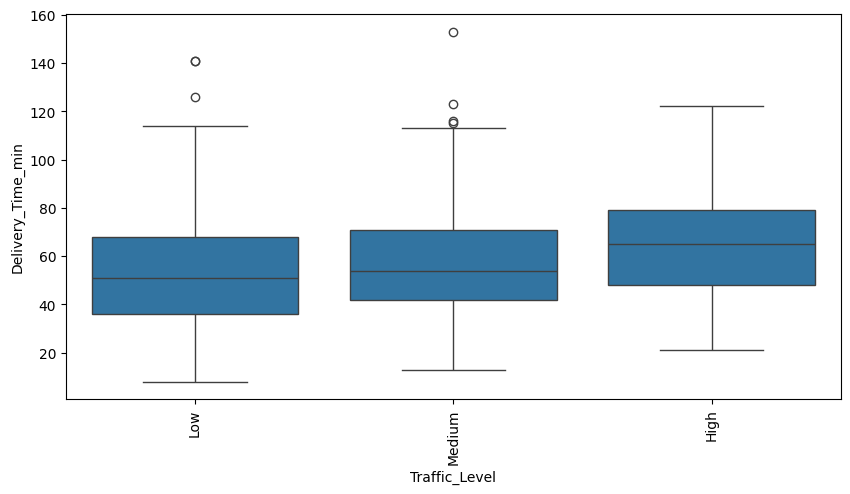

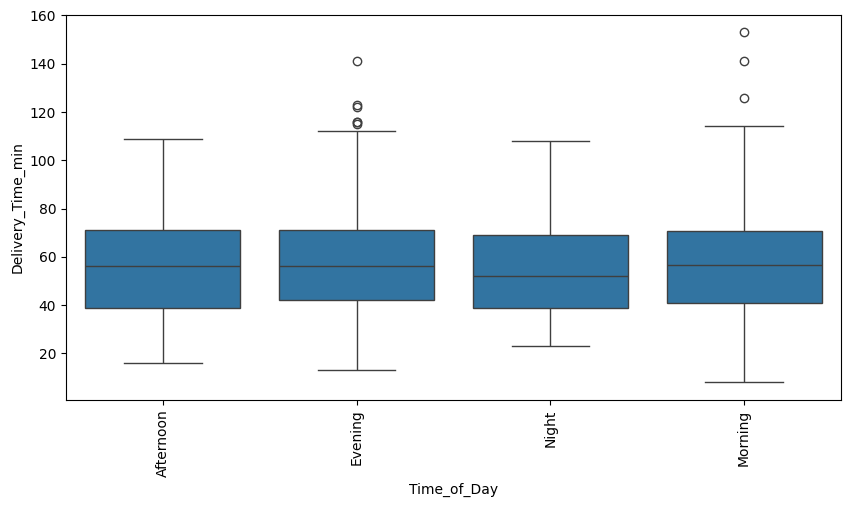

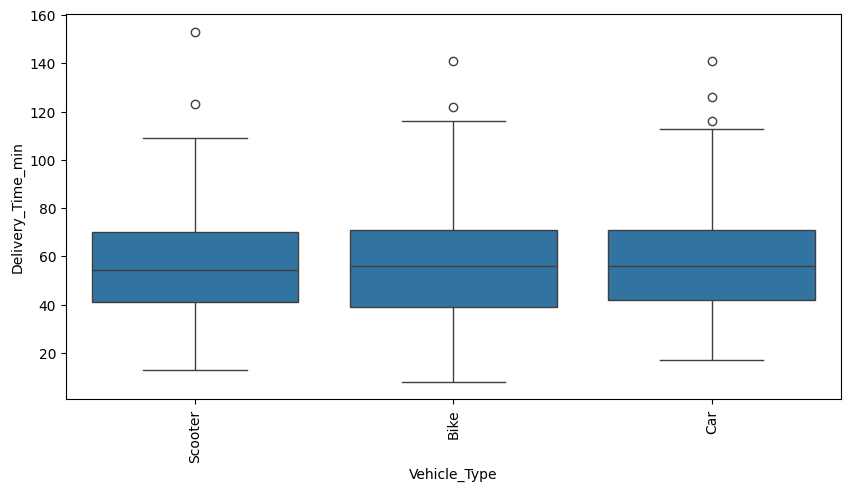

In [235]:
categorical_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col,y='Delivery_Time_min',data=df)
    plt.xticks(rotation=90)
    plt.show()


In [236]:
from scipy.stats import f_oneway

categorical_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
annova_results = {}
for col in categorical_cols:
    groups = [df['Delivery_Time_min'][df[col] == status] for status in df[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    annova_results[col] = {'F-statistic': f_statistic, 'p-value': p_value}

print(annova_results)

{'Weather': {'F-statistic': np.float64(10.499059475928275), 'p-value': np.float64(2.472288388818336e-08)}, 'Traffic_Level': {'F-statistic': np.float64(19.751338347737303), 'p-value': np.float64(3.86970694692821e-09)}, 'Time_of_Day': {'F-statistic': np.float64(0.3467656622540361), 'p-value': np.float64(0.7915076876030978)}, 'Vehicle_Type': {'F-statistic': np.float64(0.5893743449801336), 'p-value': np.float64(0.554867344896123)}}


### ANOVA Test Results Summary

The ANOVA test results indicate the following:

*   **Weather**: The p-value for 'Weather' is `2.47e-08`, which is significantly less than the common significance level of 0.05. This suggests that there is a statistically significant difference in 'Delivery_Time_min' across different weather conditions.

*   **Traffic_Level**: The p-value for 'Traffic_Level' is `3.87e-09`, which is also significantly less than 0.05. This indicates a statistically significant difference in 'Delivery_Time_min' across different traffic levels.

*   **Time_of_Day**: The p-value for 'Time_of_Day' is `0.7915`, which is greater than 0.05. This suggests that 'Time_of_Day' does not have a statistically significant impact on 'Delivery_Time_min'.

*   **Vehicle_Type**: The p-value for 'Vehicle_Type' is `0.5549`, which is greater than 0.05. This indicates that 'Vehicle_Type' does not have a statistically significant impact on 'Delivery_Time_min'.

**Conclusion:** 'Weather' and 'Traffic_Level' are significant factors influencing 'Delivery_Time_min', while 'Time_of_Day' and 'Vehicle_Type' do not show a significant impact based on these ANOVA tests.

In [237]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])
df['Traffic_Level'] = le.fit_transform(df['Traffic_Level'])
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,0,1,1,13,3.0,54
996,271,16.28,2,1,2,2,8,9.0,71
997,861,15.62,3,0,1,2,26,2.0,81
998,436,14.17,0,1,0,0,8,0.0,55


In [238]:
X = df.drop(['Delivery_Time_min'],axis=1)
Y = df['Delivery_Time_min']


In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 232.445
R-squared: 0.4814122911723464


In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 114.63078100000001
R-squared: 0.7442572906282581


In [243]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 1001),
    'max_features': randint(1, X.shape[1] + 1),
    'max_depth': randint(5, 31),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),

}

In [244]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
best_model = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 16, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 739}


In [246]:
import pickle

# Save the best model to a pickle file
filename = 'best_rf_model.pkl'
pickle.dump(best_rf_model, open(filename, 'wb'))

print(f"Model successfully saved as {filename}")

Model successfully saved as best_rf_model.pkl


In [245]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Train the model
best_rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(Y_test, Y_pred_optimized)
r2_optimized = r2_score(Y_test, Y_pred_optimized)

print(f'Optimized Mean Squared Error: {mse_optimized}')
print(f'Optimized R-squared: {r2_optimized}')

Optimized Mean Squared Error: 99.86260499542539
Optimized R-squared: 0.7772052764217829
